# Gradient Descent and Neural Networks

# Introduction

Gradient descent is a first-order iterative optimization algorithm designed to locate a local minimum or maximum of a function. This technique is frequently employed in machine learning (ML) and deep learning (DL) to minimize a cost or loss function, such as in linear regression.
Let $f(x)$ is some differentiable function of $x$. We aim to solve the following minimization problem:

$$ min_{x \in {R^n}} f(x)$$

To locate the local minimum of a function using Gradient Descent, one should move in the direction opposite to the gradient of the function at the current point, with step sizes proportional to the gradient's magnitude. Essentially, this involves moving along the slope of the curve at a specific point in the reverse direction.

## Gradient Descent Procedure

The Gradient Descent method repeatedly computes the next position by taking the gradient at the current point, scaling it with a learning rate, and then subtracting this value from the current position to make a step. This subtraction is performed because the goal is to minimize the function; to maximize it, one would add instead.
the procedure starts off with initial values of $x_0$. The iterative method updates $x$ as

$$x_{n+1} = x_n-\alpha \triangledown f(x_n)$$

where $\alpha$ is the step length and $\triangledown f(x_n)$ is the gradient of $f(x_n)$.

<img src="Image/gradient-descent.png" alt="Drawing" style="width: 500px;"/>

#### Learning Rate

The step length $\alpha$ is called Learning rate, is a crucial scaling factor in the optimization process of Gradient Descent. It determines the size of the steps taken towards the minimum. If set too low, the algorithm requires many iterations to converge, leading to a slow process. Conversely, a too high learning rate might cause overshooting of the optimal "valley," potentially leading to even higher values than where it started


#### Examples

* For linear regression, $\hat y^i = wx^i +b$, where $w$ is the weight and $b$ is the bias. 
    - Goal: find the best line fitting the data, i.e., find the optimal linear function approximating the data.

* In Neural Network, which are powerful function approximates.
    - Components (Input of neural networks): 1) Weights and bias, 2) Activation function, and 3) Loss function
    - Loss function: 
    $$L(w,b)= \frac {1}{2M} \sum_{i=1}^{M}{(wx^i +b -y^i)^2}$$
    where $M$ is the number of training data points
    - Goal: find the $w$ and $b$ that minimize the Loss function $L(w,b)$.

Gradient Descent is the best way to achieve the above goals!

#### Algorithm

Here, I use the Loss function of $L(w,b)= \frac {1}{2M} \sum_{i=1}^{M}{(wx^i +b -y^i)^2}$ format as an example to show how this algorithm works.

* Step 1: Randomly choose intial $w$ and $b$ (w, b = np.random.rand(2))

* Step 2: Set MAX_ITER = 50 and COUNT = 0

* Step 3: While COUNT < MAX_ITER do 

    - $w = w - \alpha \times \frac{\partial L(w, b)}{\partial w}$
    - $b = b - \alpha \times \frac{\partial L(w, b)}{\partial w}$
    - COUNT += 1

---

# Implement

In the subsequent sections of this notebook, the implementation is divided into two parts:

* **Part 1**:  Identify the optimal linear model for a dataset containing four data points using Gradient Descent.

* **Part 2**: Apply Gradient Descent to develop a linear regression model that predicts penguin body mass based on flipper length.

---

## Part 1:

There are 6 points in the data, $D = \left \{  (3,5), (4.5,7.5), (5.5,9),(6,11), (8, 12), (10.5, 15)\right \}$.

The task is to find the best linear model $\hat y^i = wx^i +b$ fitting the data.

We use the Loss funciton: $L(w,b)= \frac {1}{2M} \sum_{i=1}^{M}{(wx^i +b -y^i)^2}$.

Thus, the derivations of the Loss function are:

$$\frac{\partial L(w, b)}{\partial w}=\frac {1}{M}\sum_{i=0}^{M}(wx^i+b-y^i)\cdot x$$

$$\frac{\partial L(w, b)}{\partial b}=\frac {1}{M}\sum_{i=0}^{M}(wx^i+b-y^i)$$

---

For this task, we will need the following libraries:

* [matplotlib](http://metplotlib.org)
* [numpy](https://numpy.org/doc/stable/index.html)

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np

#### Import the dataset: 
$D = \left \{  (3,5), (4.5,7.5), (5.5,9),(6,11), (8, 12), (10.5, 15)\right \}$.

In [2]:
# Import dataset values and set as numpy arrays
X = np.array([3.0, 4.5, 5.5, 6.0, 8, 10.5])
y = np.array([5.0, 7.5, 9.0, 11.0, 12, 15])

#### Define the Loss function:

 $L(w,b)= \frac {1}{2M} \sum_{i=1}^{M}{(wx^i +b -y^i)^2}$

In [3]:
# Define the Loss function:
def Loss(X, y, w, b):
    # Set up M, which is the number for the training of data points
    M = len(y)
    # Set up the Loss function
    loss = sum(.5*(x*w + b - y[i])**2 for i, x in enumerate(X))/M  ## enumerate output the index?
    return loss

#### Define the Gradient Descent function:

The derivations of the Loss function are:

$$\frac{\partial L(w, b)}{\partial w}=\frac {1}{M}\sum_{i=0}^{M}(wx^i+b-y^i)\cdot x$$

$$\frac{\partial L(w, b)}{\partial b}=\frac {1}{M}\sum_{i=0}^{M}(wx^i+b-y^i)$$

In [4]:
# Gradient Descent function
def gradL(X, y, w, b):
    # Set up M: the number of the training data points
    M = len(y)
    # Define the derivations of the Loss function
    partial_w = sum((x*w + b - y[i])*x for i, x in enumerate(X))/M
    partial_b = sum((x*w + b - y[i]) for i, x in enumerate(X))/M
    # Output the derivations fo the Loss function
    return partial_w, partial_b

#### Implement the functions to fit the data:

* Set up the Learning rate hyperparameter $\alpha = 0.01$.
* Set MAX_ITER = 200

1.3884486257596693 1.1543122568386526


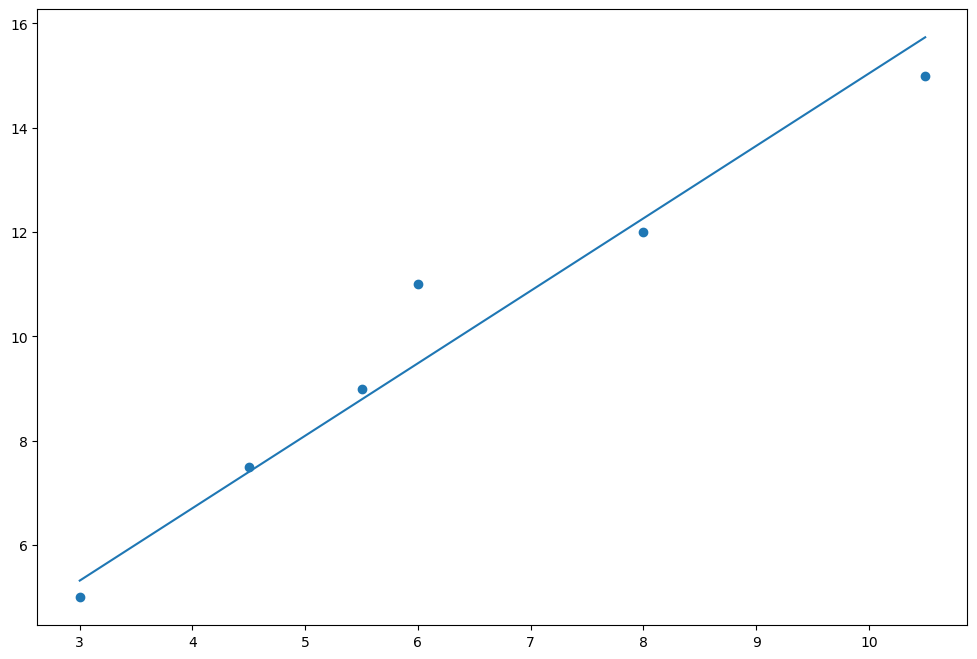

In [5]:
# Define learning rate
a = 0.01

# Randomly assign initial w and b
random_vec = np.random.rand(2)
w = random_vec[0]
b = random_vec[1]

# Set up M, which is the number of the training data points
M = len(y)

# Iterate 200 times to find the w and b that minimize the Loss function
for i in range(201):
    dw, db = gradL(X, y, w, b)
    w = w - a * dw
    b = b- a * db
    L = Loss(X, y, w, b)

# Output the w and b    
print (w,b)

# Plot the fitting line with the data points
plt.figure(figsize = (12, 8))
plt.scatter(X, y)
plt.plot(X, [w*x + b for x in X])

From the results above, we can get the linear regression model:

$$\hat y^i = 1.413x^i +0.976$$

---

#### How do the Loss and the fitting model change through the iterations?

To answer this question, we print the Loss and plot the lines for the iterations of 40, 80, 120, 160, and 200.


Loss at iter40=0.32742196211971714
Loss at iter80=0.3175355303577512
Loss at iter120=0.30861656675185706
Loss at iter160=0.30057039663522456
Loss at iter200=0.2933116100310266


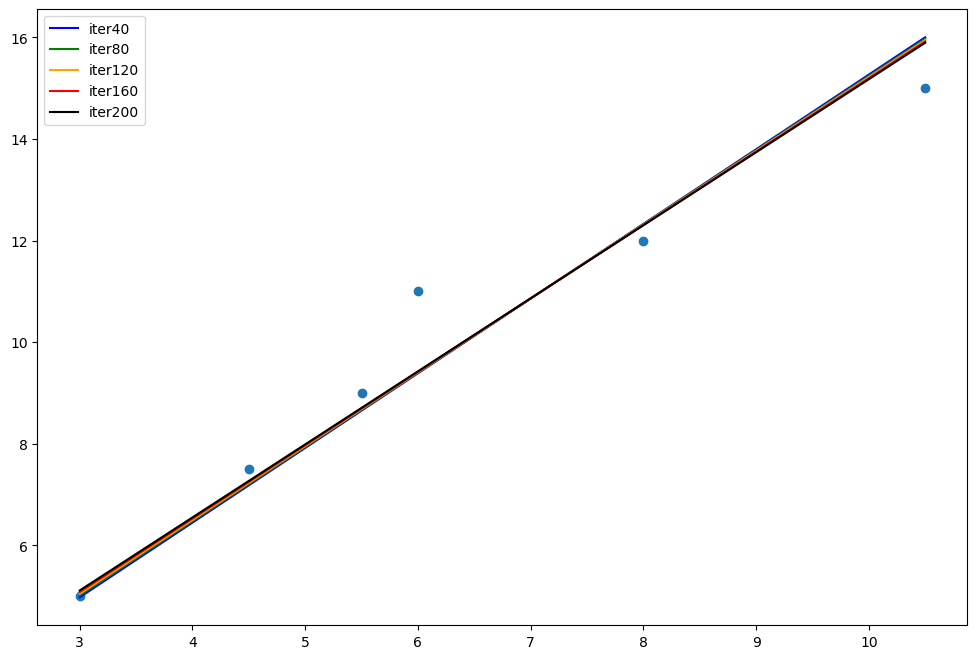

In [6]:
# Set up the learning rate
a = 0.01

# Randomly initial w and b
random_vec = np.random.rand(2)
w = random_vec[0]
b = random_vec[1]

# Set up M, which is the number of the training data points
M = len(y)

# Set up the parameters to plot
plt.figure(figsize = (12, 8))
plt.scatter(X, y)
colors = {40: 'blue', 80: 'green', 120: 'orange', 160: 'red', 200: 'black'}

# Iterate 200 times to find the w and b that minimize the Loss function
for i in range(201):
    dw, db = gradL(X, y, w, b)
    w = w - a * dw
    b = b- a * db
    L = Loss(X, y, w, b)
    
    if i in [40, 80, 120, 160, 200]:
        # Print the Loss velus during the iterations
        print(f'Loss at iter{i}={L}')
        # Plot the lines during the iterations
        plt.plot(X, [w*x + b for x in X], label = f'iter{i}', color = colors[i])
        
plt.legend()
plt.show()

From the results presented, we can see that the Loss values diminish over the iterations, and the slopes of the fitted lines (weights) gradually decrease. Ultimately, after 200 iterations, we determine the optimal values of $w$ and $b$ that correspond to the minimum Loss function.


Let's try different learning rates! 
* A smaller one $\alpha = 0.001$
* A larger one $\alpha = 0.025$

Loss at iter40=0.448448630444604
Loss at iter80=0.29361002578183254
Loss at iter120=0.289344695736314
Loss at iter160=0.28861623498366173
Loss at iter200=0.2879771354244563


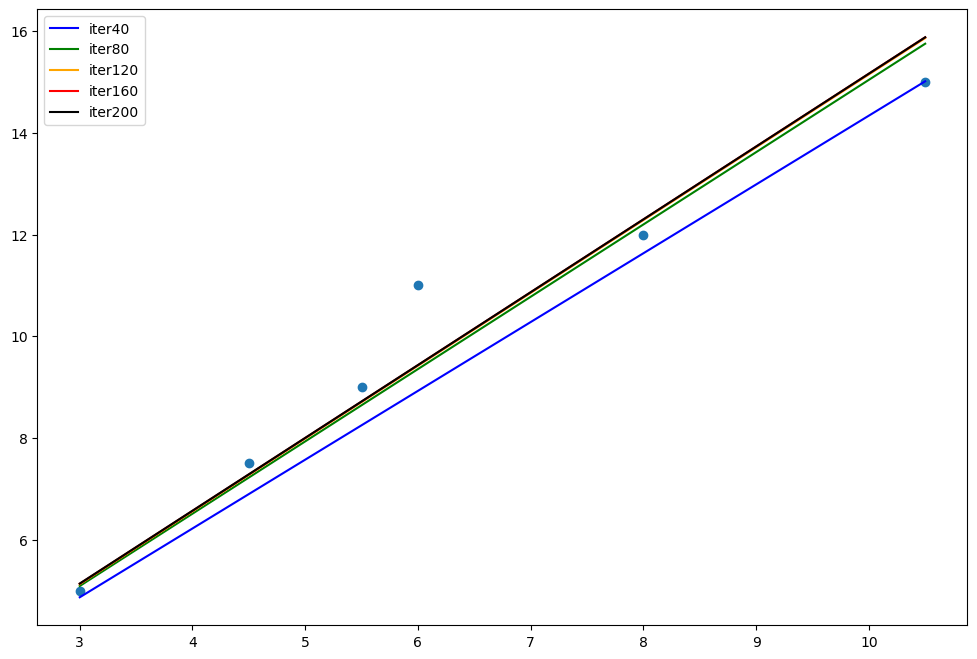

In [7]:
# Set up the learning rate
a = 0.001

# Randomly initial w and b
random_vec = np.random.rand(2)
w = random_vec[0]
b = random_vec[1]

# Set up M, which is the number of the training data points
M = len(y)

# Set up the parameters to plot
plt.figure(figsize = (12, 8))
plt.scatter(X, y)
colors = {40: 'blue', 80: 'green', 120: 'orange', 160: 'red', 200: 'black'}

# Iterate 200 times to find the w and b that minimize the Loss function
for i in range(201):
    dw, db = gradL(X, y, w, b)
    w = w - a * dw
    b = b- a * db
    L = Loss(X, y, w, b)
    
    if i in [40, 80, 120, 160, 200]:
        # Print the Loss velus during the iterations
        print(f'Loss at iter{i}={L}')
        # Plot the lines during the iterations
        plt.plot(X, [w*x + b for x in X], label = f'iter{i}', color = colors[i])
        
plt.legend()
plt.show()

Loss at iter40=1.974418174538515e+85
Loss at iter80=7.06982728379759e+166
Loss at iter120=2.531503126707762e+248
Loss at iter160=inf
Loss at iter200=inf


/var/folders/71/wbvz3jq543x2lq6fv1yy8kh00000gn/T/ipykernel_63371/1116726847.py:6: RuntimeWarning: overflow encountered in scalar add
  loss = sum(.5*(x*w + b - y[i])**2 for i, x in enumerate(X))/M  ## enumerate output the index?
/var/folders/71/wbvz3jq543x2lq6fv1yy8kh00000gn/T/ipykernel_63371/1116726847.py:6: RuntimeWarning: overflow encountered in scalar power
  loss = sum(.5*(x*w + b - y[i])**2 for i, x in enumerate(X))/M  ## enumerate output the index?


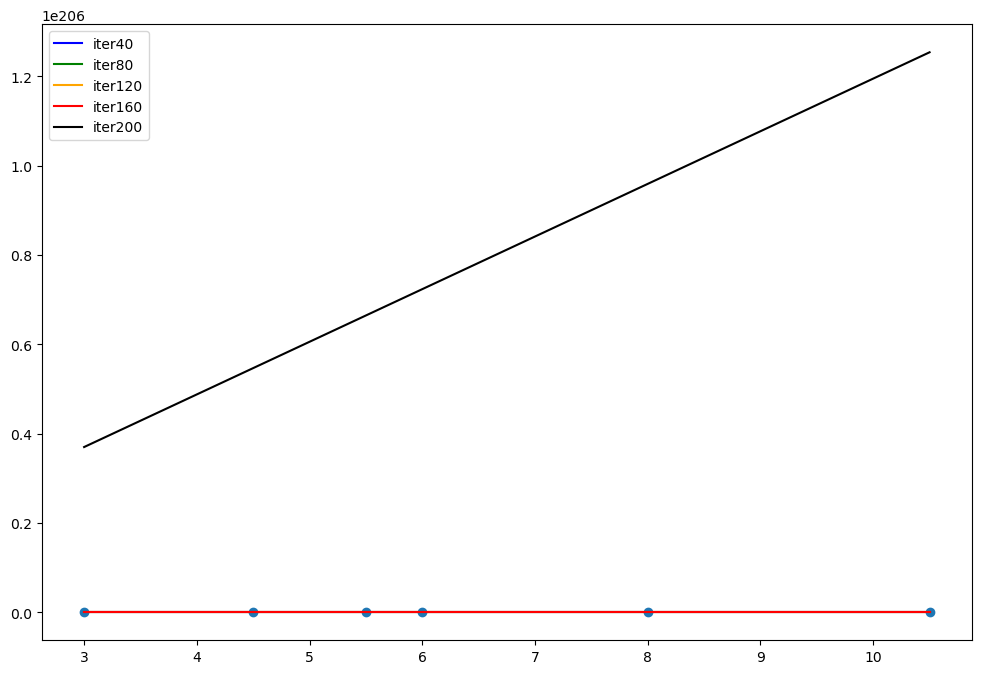

In [8]:
# Set up the learning rate
a = 0.25

# Randomly initial w and b
random_vec = np.random.rand(2)
w = random_vec[0]
b = random_vec[1]

# Set up M, which is the number of the training data points
M = len(y)

# Set up the parameters to plot
plt.figure(figsize = (12, 8))
plt.scatter(X, y)
colors = {40: 'blue', 80: 'green', 120: 'orange', 160: 'red', 200: 'black'}

# Iterate 200 times to find the w and b that minimize the Loss function
for i in range(201):
    dw, db = gradL(X, y, w, b)
    w = w - a * dw
    b = b- a * db
    L = Loss(X, y, w, b)
    
    if i in [40, 80, 120, 160, 200]:
        # Print the Loss velus during the iterations
        print(f'Loss at iter{i}={L}')
        # Plot the lines during the iterations
        plt.plot(X, [w*x + b for x in X], label = f'iter{i}', color = colors[i])
        
plt.legend()
plt.show()


---

### Part 2:

The objective is to find a linear regression model to predict the flipper length of penguin by the body mass using the Penguins Dataset. 

### About the Penguins Dataset

Here is the information about this dataset.

* species: penguin species (Chinstrap, Adélie, or Gentoo)
* island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
* bill: bill length (mm)
* bill_depth_mm: bill depth (mm)
* flipper_length_mm: flipper length (mm)
* body_mass_g: body mass (g)
* sex: penguin sex

My focus will be on the estimation of the flipper length using the boby mass of penguins. 

<img src="Image/body-parts-penguin.jpeg" alt="Drawing" style="width: 500px;"/>


---

### Define Model and Loss function

To achieve the goal, I define the linear regression model as $\hat y^i = wx^i +b$, and I also use the Loss funciton $L(w,b)= \frac {1}{2M} \sum_{i=1}^{M}{(wx^i +b -y^i)^2}$.


---

### Import Necessary Libraries

For this task, we will need the following libraries:

* [matplotlib](http://metplotlib.org)
* [numpy](https://numpy.org/doc/stable/index.html)
* [pandas](http://pandas.pydata.org)
* [seaborn](https://seaborn.pydata.org/)
* [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split) in [sklearn.model_selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection)
* [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linearregression#sklearn.linear_model.LinearRegression) in [sklearn.linear_model](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)

In [9]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Data Understanding and Data Wrangling

In [10]:
# Import Penguins dataset
penguins = pd.read_csv("Data/penguins.csv")

In [11]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [12]:
penguins.shape

(344, 7)

In [13]:
# Remove the Na values in the features 'flipper_length_mm' and 'body_mass_g'
penguins = penguins.dropna(subset = ['flipper_length_mm', 'body_mass_g'])

In [14]:
penguins.shape

(342, 7)

Plot the scatter plot to see the data distribution:

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

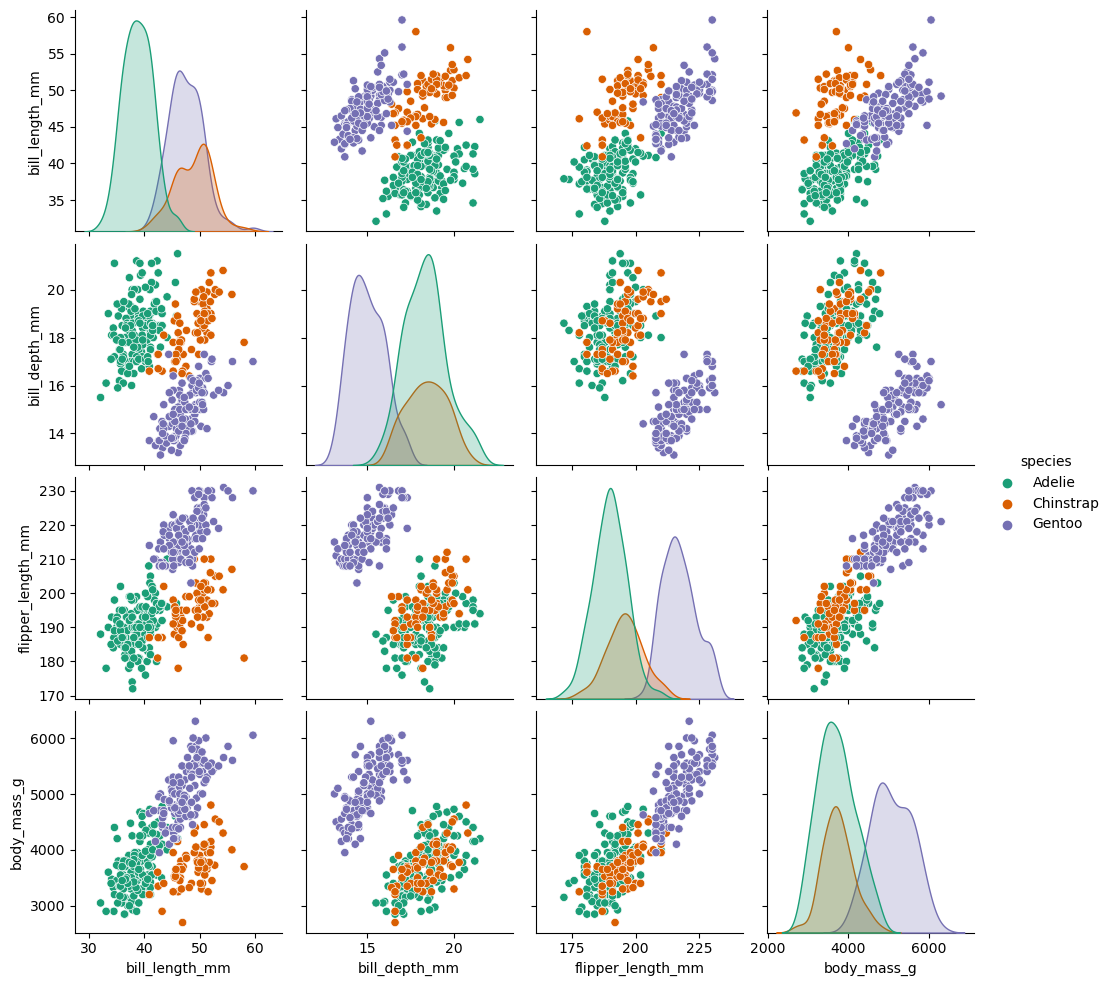

In [15]:
sns.pairplot(penguins, hue='species',palette='Dark2')

Text(0.5, 1.0, 'Penguins Data')

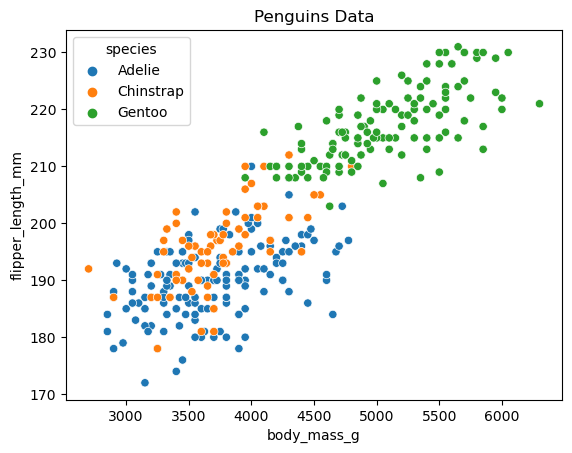

In [16]:
sns.scatterplot(data = penguins, x = "body_mass_g", y = "flipper_length_mm", hue = 'species').set_title("Penguins Data")

The figures above indicate that there is a linear correlation between body mass and flipper length across different penguin species.

Therefore, data from all penguin species can be combined to develop a linear model.

### Train and Test Data Split

In [17]:
# Extract out desired features from Penguins Dataset, and covert features to numpy array
X = penguins['body_mass_g'].to_numpy()

# Extract out labels, and convert labels to numpy array
y = penguins['flipper_length_mm'].to_numpy()

In [18]:
# Use the train_test_split function in sklearn package
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.33,
                                                    random_state = 42) 

### Define the functions for Gradient Descent

Since we are using the same model and Loss function as Part 1 above, we can directly apply -the defined Loss function and the Gradient Descent function in this part.

In [20]:
# Define the Loss function:
def Loss(X, y, w, b):
    # Set up M, which is the number of the training data points
    M = len(y)
    # Set up the Loss function
    loss = sum(.5*(x*w + b - y[i])**2 for i, x in enumerate(X))/M  ## enumerate output the index?
    return loss

# Define the Gradient Descent function
def gradL(X, y, w, b):
    # Set up M, which is the number of the training data points
    M = len(y)
    # Set up the derivations of the Loss function
    partial_w = sum((x*w + b - y[i])*x for i, x in enumerate(X))/M
    partial_b = sum((x*w + b - y[i]) for i, x in enumerate(X))/M
    # Output the derivations fo the Loss function
    return partial_w, partial_b

### Train the data to find the best linear model

Since the X and y have different scales, the learning rate should be much smaller. I set $\alpha=0.00003$ and run 2000 iterations.

/var/folders/71/wbvz3jq543x2lq6fv1yy8kh00000gn/T/ipykernel_63371/1447881146.py:6: RuntimeWarning: overflow encountered in scalar power
  loss = sum(.5*(x*w + b - y[i])**2 for i, x in enumerate(X))/M  ## enumerate output the index?
/var/folders/71/wbvz3jq543x2lq6fv1yy8kh00000gn/T/ipykernel_63371/1447881146.py:14: RuntimeWarning: overflow encountered in scalar add
  partial_w = sum((x*w + b - y[i])*x for i, x in enumerate(X))/M
/var/folders/71/wbvz3jq543x2lq6fv1yy8kh00000gn/T/ipykernel_63371/1048597397.py:16: RuntimeWarning: invalid value encountered in scalar subtract
  w = w - a * dw


nan nan


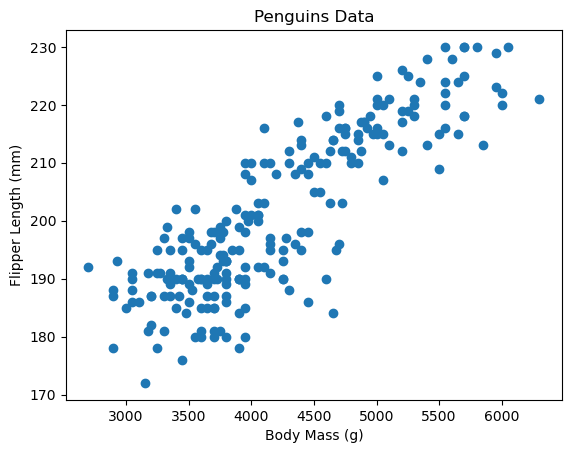

In [21]:
# Set up the learning rate
a = 0.00003

# Randomly initial w and b
random_vec = np.random.rand(2)
w = random_vec[0]
b = random_vec[1]

# Set up M, which is the number of the training data points
M = len(y_train)

# Iterate 1000 times to find the w and b that minimize the Loss function
for i in range(2001):
    dw, db = gradL(X_train, y_train, w, b)
    #print(dw, db)
    w = w - a * dw
    b = b- a * db
    #print(w, b)
    L = Loss(X_train, y_train, w, b)

# Output the w and b    
print(w,b)

# Plot the fitting line with the data points
plt.scatter(X_train, y_train)
plt.plot(X_train, [w*x + b for x in X_train])
plt.title("Penguins Data")
plt.xlabel("Body Mass (g)")
plt.ylabel("Flipper Length (mm)")
plt.show()

I also aim to observe the changes in the Loss and the adaptation of the model throughout the iterations.

Loss at iter10=2.487807307436109e+44
Loss at iter20=1.238762649146538e+79
Loss at iter30=6.168214460717272e+113
Loss at iter50=1.5293334624301074e+183
Loss at iter100=inf


/var/folders/71/wbvz3jq543x2lq6fv1yy8kh00000gn/T/ipykernel_63371/1447881146.py:6: RuntimeWarning: overflow encountered in scalar power
  loss = sum(.5*(x*w + b - y[i])**2 for i, x in enumerate(X))/M  ## enumerate output the index?


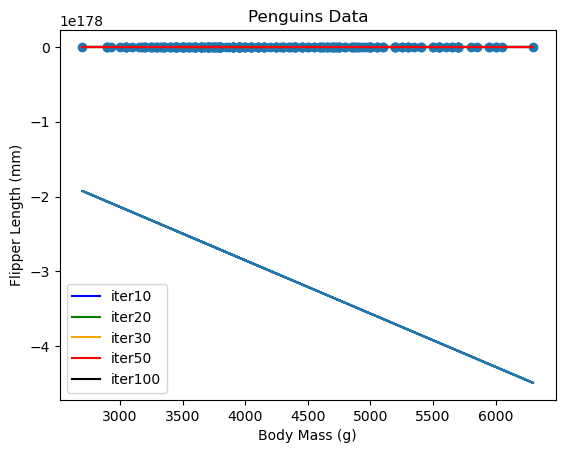

In [23]:
# Set up the learning rate
a = 0.000003

# Randomly initial w and b
random_vec = np.random.rand(2)
w = random_vec[0]
b = random_vec[1]

# Set up M, which is the number of the training data points
M = len(y_train)

# Set up the parameters to plot
plt.scatter(X_train, y_train)
colors = {10: 'blue', 20: 'green', 30: 'orange', 50: 'red', 100: 'black'}

# Iterate 100 times to find the w and b that minimize the Loss function
for i in range(101):
    dw, db = gradL(X_train, y_train, w, b)
    w = w - a * dw
    b = b- a * db
    L = Loss(X_train, y_train, w, b)
    
    if i in [10, 20, 30, 50, 100]:
        # Print the Loss velus during the iterations
        print(f'Loss at iter{i}={L}')
        # Plot the lines during the iterations
        plt.plot(X_train, [w*x + b for x in X_train], label = f'iter{i}', color = colors[i])
        
plt.legend()
plt.plot(X_train, [w*x + b for x in X_train])
plt.title("Penguins Data")
plt.xlabel("Body Mass (g)")
plt.ylabel("Flipper Length (mm)")
plt.show()
plt.show()

From the results shown, it's clear that the Loss values reduce across the iterations and the lines gradually approximate the final fitting line..

---

### Check the performance on test data

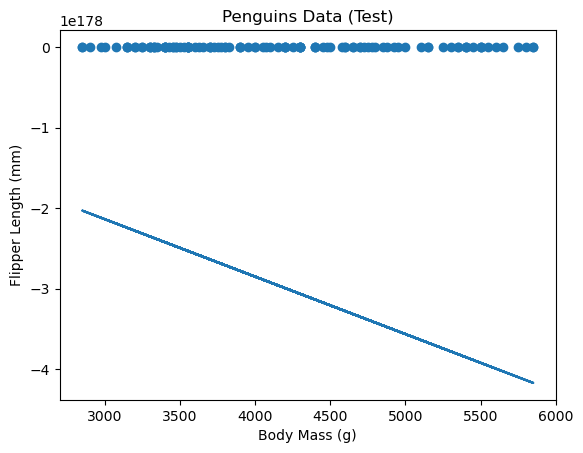

In [24]:
# Plot the test scatters with the predicted line
plt.scatter(X_test, y_test)
plt.plot(X_test, [w*x + b for x in X_test])
plt.title("Penguins Data (Test)")
plt.xlabel("Body Mass (g)")
plt.ylabel("Flipper Length (mm)")
plt.show()

---

### Scale and Fit

Try to scale this two variable and repeat the precedures:

I scale the y_train values by the ratio of the mean of X and y.

In [30]:
# Scale y_train data by the ratio of the mean of X_train and y_train
X_mean = X_train.mean()
y_mean = y_train.mean()
s = y_mean/X_mean
y_train_scaled = y_train/s

/var/folders/71/wbvz3jq543x2lq6fv1yy8kh00000gn/T/ipykernel_63371/1447881146.py:6: RuntimeWarning: overflow encountered in square
  loss = sum(.5*(x*w + b - y[i])**2 for i, x in enumerate(X))/M  ## enumerate output the index?
/var/folders/71/wbvz3jq543x2lq6fv1yy8kh00000gn/T/ipykernel_63371/1447881146.py:14: RuntimeWarning: overflow encountered in add
  partial_w = sum((x*w + b - y[i])*x for i, x in enumerate(X))/M
/var/folders/71/wbvz3jq543x2lq6fv1yy8kh00000gn/T/ipykernel_63371/1988304555.py:16: RuntimeWarning: invalid value encountered in subtract
  w = w - a * dw


[nan] [nan]


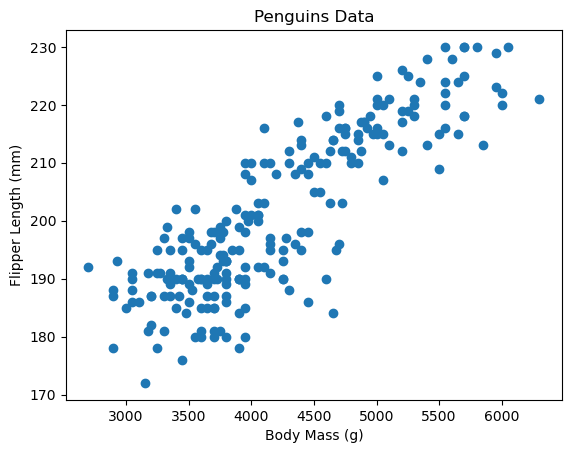

In [31]:
# Set up the learning rate
a = 0.00001

# Randomly initial w and b
random_vec = np.random.rand(2)
w = random_vec[0]
b = random_vec[1]

# Set up M, which is the number of the training data points
M = len(y_train)

# Iterate 1000 times to find the w and b that minimize the Loss function
for i in range(1001):
    dw, db = gradL(X_train, y_train_scaled, w, b)
    #print(dw, db)
    w = w - a * dw
    b = b- a * db
    #print(w, b)
    L = Loss(X_train, y_train_scaled, w, b)

# Output the w and b (inverse-transformed)   
print(s*w,s*b)

# Plot the fitting line with the data points
plt.scatter(X_train, y_train)
plt.plot(X_train, [w*s*x + b*s for x in X_train])
plt.title("Penguins Data")
plt.xlabel("Body Mass (g)")
plt.ylabel("Flipper Length (mm)")
plt.show()


---

### Validate the regression model by *LinearReression* function in sklearn package:

In [32]:
# Extract out desired features from Penguins Dataset, and covert features to numpy array
X = penguins['body_mass_g'].to_numpy()

# Extract out labels, and convert labels to numpy array
y = penguins['flipper_length_mm'].to_numpy()

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.33,
                                                   random_state = 42) # like seed in R

# Reshape the np.array to meet the requirement of LinearReression function 
X_train = np.reshape(X_train, (-1, 1))
y_train = np.reshape(y_train, (-1, 1))
X_test = np.reshape(X_test, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))

In [34]:
# Import and implement LinearReression in sklearn
reg = LinearRegression()
reg.fit(X_train, y_train)
print(reg.coef_, reg.intercept_)

[[0.01512412]] [137.31792602]


The model predicted by *LinearReression* function is 

$$\hat y^i = 0.015x+137.32$$
suggesting that the penguins' body mass increase by 1 g would lead to the increment of flipper length by 0.015 mm.

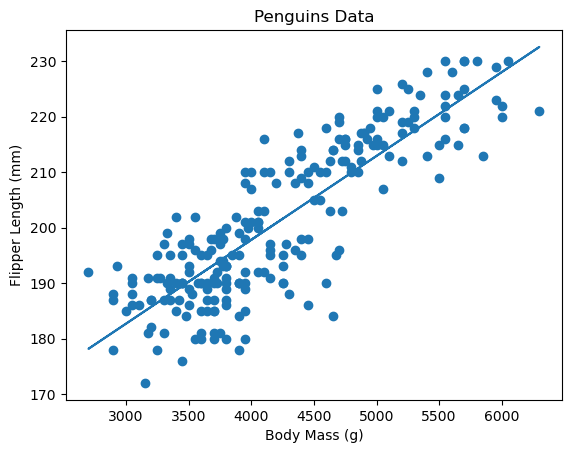

In [35]:
# Plot for Prediction model using training data
y_pred = reg.predict(X_train)
plt.scatter(X_train, y_train)
plt.plot(X_train,y_pred)
plt.title("Penguins Data")
plt.xlabel("Body Mass (g)")
plt.ylabel("Flipper Length (mm)")
plt.show()

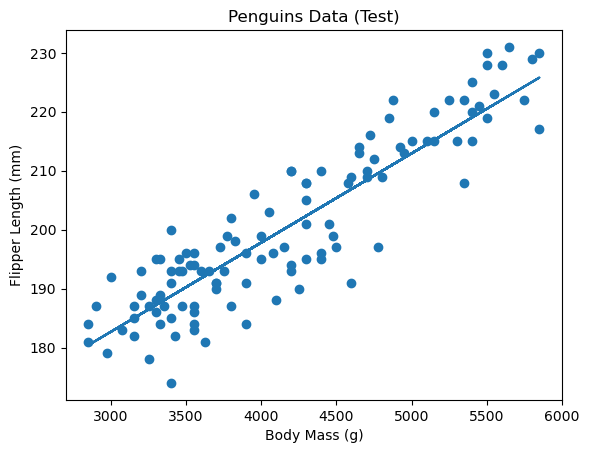

In [37]:
# Plot for prediction model using test data
y_pred = reg.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test,y_pred)
plt.title("Penguins Data (Test)")
plt.xlabel("Body Mass (g)")
plt.ylabel("Flipper Length (mm)")
plt.show()

From scatter plots with predicted model, almost all the points located around the regression line, which means that the predicted model perform well!

---

### Conclusion

The performance of my Gradient Descent algorithm to that of the *LinearReression* function in sklearn package, the *LinearReression* function works better. There must be some parameters that need to be further adjusted.